In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn import under_sampling
from imblearn import over_sampling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_credit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MODELAGEM E PREPARAÇÃO DE DADOS/creditcard_transformed.csv')
df_credit

,X1,X2,Y
0,1.359780,0.071828,0
1,-1.191891,-0.265616,0
2,1.358334,1.340460,0
3,0.966301,0.185586,0
4,1.158246,-0.877576,0
...,...,...,...
284802,11.881180,-10.070988,0
284803,0.732786,0.055567,0
284804,-1.919607,0.300897,0
284805,0.240429,-0.531824,0


In [ ]:
df_credit.Y.value_counts()

0    284315
1       492
Name: Y, dtype: int64

In [ ]:
X, y = df_credit[['X1', 'X2']], df_credit['Y']

##Undersampling

#### Random

In [ ]:
X_under_random, y_under_random = under_sampling.RandomUnderSampler(sampling_strategy=0.5, random_state=42).fit_resample(X,y)
df_under_random = pd.DataFrame.from_records(X_under_random)
df_under_random['Y'] = y_under_random
df_under_random

,X1,X2,Y
0,-1.314560,-0.591104,0
1,0.798660,-1.184863,0
2,0.391127,0.245754,0
3,0.060292,-1.065894,0
4,-1.848438,-0.371936,0
...,...,...,...
1471,1.927778,-1.127715,1
1472,-1.378649,-1.290545,1
1473,0.676084,-1.127123,1
1474,3.113735,-0.587756,1


<AxesSubplot:xlabel='X1', ylabel='X2'>

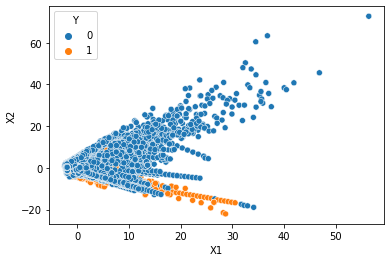

In [ ]:
sns.scatterplot(data=df_credit, x="X1", y="X2", hue="Y")

<AxesSubplot:xlabel='X1', ylabel='X2'>

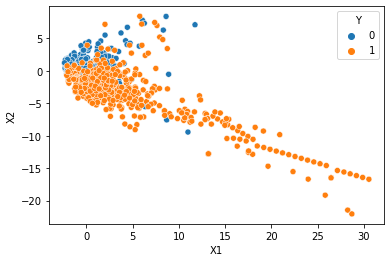

In [ ]:
sns.scatterplot(data=df_under_random, x="X1", y="X2", hue="Y")

In [ ]:
df_under_random.Y.value_counts()

0    984
1    492
Name: Y, dtype: int64

#### CNN

In [ ]:
X_1, y_1 = df_under_random[['X1', 'X2']], df_under_random['Y']

In [ ]:
X_cnn, y_cnn = under_sampling.CondensedNearestNeighbour(random_state=42, n_jobs=-1).fit_resample(X,y)
df_cnn = pd.DataFrame.from_records(X_cnn)
df_cnn['Y'] = y_cnn
df_cnn

,X1,X2,Y
0,2.373076,-2.562259,0
1,-1.314560,-0.591104,0
2,0.798660,-1.184863,0
3,0.391127,0.245754,0
4,0.060292,-1.065894,0
...,...,...,...
756,1.927778,-1.127715,1
757,-1.378649,-1.290545,1
758,0.676084,-1.127123,1
759,3.113735,-0.587756,1


<AxesSubplot:xlabel='X1', ylabel='X2'>

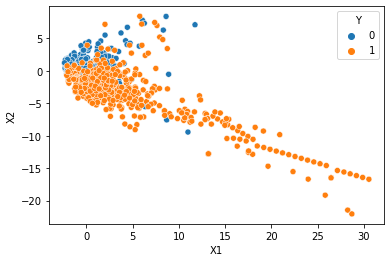

In [ ]:
sns.scatterplot(data=df_under_random, x="X1", y="X2", hue="Y")

<AxesSubplot:xlabel='X1', ylabel='X2'>

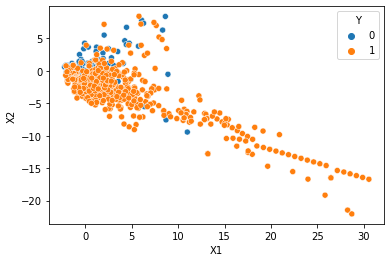

In [ ]:
sns.scatterplot(data=df_cnn, x="X1", y="X2", hue="Y")

In [ ]:
df_cnn.Y.value_counts()

1    492
0    269
Name: Y, dtype: int64

####Tomek Links

In [ ]:
X_tomek, y_tomek = under_sampling.TomekLinks().fit_resample(X,y)
df_tomek = pd.DataFrame.from_records(X_tomek)
df_tomek['Y'] = y_tomek
df_tomek

,X1,X2,Y
0,1.359780,0.071828,0
1,-1.191891,-0.265616,0
2,1.358334,1.340460,0
3,0.966301,0.185586,0
4,1.158246,-0.877576,0
...,...,...,...
284585,11.881180,-10.070988,0
284586,0.732786,0.055567,0
284587,-1.919607,0.300897,0
284588,0.240429,-0.531824,0


<AxesSubplot:xlabel='X1', ylabel='X2'>

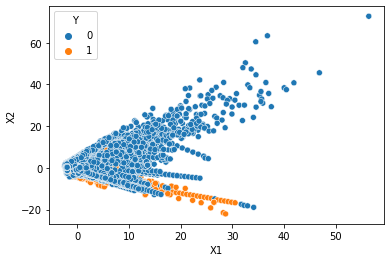

In [ ]:
sns.scatterplot(data=df_credit, x="X1", y="X2", hue="Y")

<AxesSubplot:xlabel='X1', ylabel='X2'>

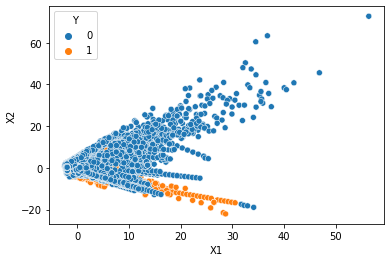

In [ ]:
sns.scatterplot(data=df_tomek, x="X1", y="X2", hue="Y")

In [ ]:
df_tomek.Y.value_counts()

0    284098
1       492
Name: Y, dtype: int64

####ENN

In [ ]:
X_enn, y_enn = under_sampling.EditedNearestNeighbours(n_neighbors=1000).fit_resample(X,y)
df_enn = pd.DataFrame.from_records(X_enn)
df_enn['Y'] = y_enn
df_enn

,X1,X2,Y
0,-1.191891,-0.265616,0
1,0.966301,0.185586,0
2,-1.229632,-0.141550,0
3,0.644274,-1.417690,0
4,0.894310,-0.286376,0
...,...,...,...
196871,1.927778,-1.127715,1
196872,-1.378649,-1.290545,1
196873,0.676084,-1.127123,1
196874,3.113735,-0.587756,1


<AxesSubplot:xlabel='X1', ylabel='X2'>

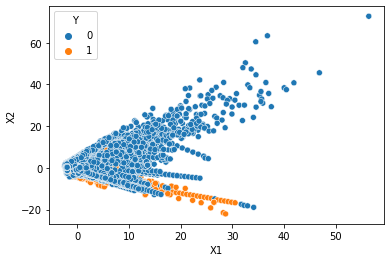

In [ ]:
sns.scatterplot(data=df_credit, x="X1", y="X2", hue="Y")

<AxesSubplot:xlabel='X1', ylabel='X2'>

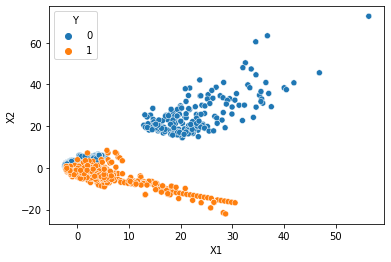

In [ ]:
sns.scatterplot(data=df_enn, x="X1", y="X2", hue="Y")

In [ ]:
df_enn.Y.value_counts()

0    196384
1       492
Name: Y, dtype: int64

####OSS

In [ ]:
X_oss, y_oss = under_sampling.OneSidedSelection(random_state=42).fit_resample(X,y)
df_oss = pd.DataFrame.from_records(X_oss)
df_oss['Y'] = y_oss
df_oss

,X1,X2,Y
0,1.004094,-1.052266,0
1,1.359780,0.071828,0
2,-1.191891,-0.265616,0
3,1.358334,1.340460,0
4,0.966301,0.185586,0
...,...,...,...
281392,1.927778,-1.127715,1
281393,-1.378649,-1.290545,1
281394,0.676084,-1.127123,1
281395,3.113735,-0.587756,1


<AxesSubplot:xlabel='X1', ylabel='X2'>

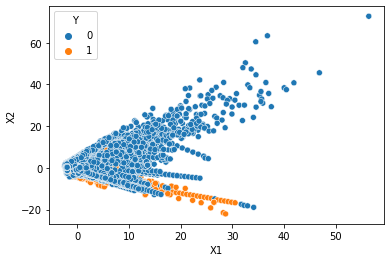

In [ ]:
sns.scatterplot(data=df_credit, x="X1", y="X2", hue="Y")

<AxesSubplot:xlabel='X1', ylabel='X2'>

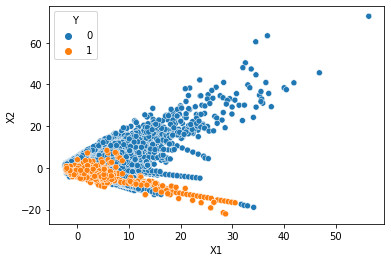

In [ ]:
sns.scatterplot(data=df_oss, x="X1", y="X2", hue="Y")

In [ ]:
df_oss.Y.value_counts()

0    280905
1       492
Name: Y, dtype: int64

####NCR

In [ ]:
X_ncr, y_ncr = under_sampling.NeighbourhoodCleaningRule(n_neighbors=1000).fit_resample(X,y)
df_ncr = pd.DataFrame.from_records(X_ncr)
df_ncr['Y'] = y_ncr
df_ncr

/usr/local/lib/python3.8/dist-packages/imblearn/under_sampling/_prototype_selection/_edited_nearest_neighbours.py:145: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  nnhood_label, _ = mode(nnhood_label, axis=1)


,X1,X2,Y
0,-1.191891,-0.265616,0
1,0.966301,0.185586,0
2,-1.229632,-0.141550,0
3,0.644274,-1.417690,0
4,0.894310,-0.286376,0
...,...,...,...
190631,1.775160,0.003761,0
190632,-2.039562,0.175207,0
190633,-1.919607,0.300897,0
190634,0.240429,-0.531824,0


<AxesSubplot:xlabel='X1', ylabel='X2'>

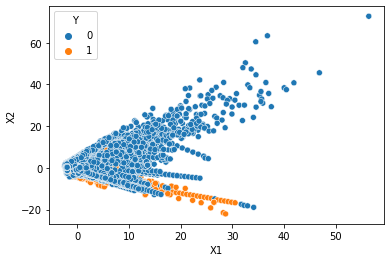

In [ ]:
sns.scatterplot(data=df_credit, x="X1", y="X2", hue="Y")

<AxesSubplot:xlabel='X1', ylabel='X2'>

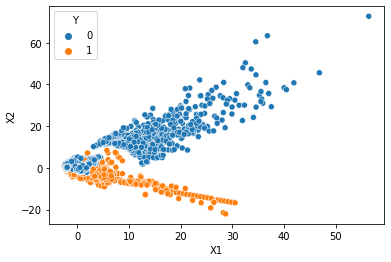

In [ ]:
sns.scatterplot(data=df_ncr, x="X1", y="X2", hue="Y")

In [ ]:
df_ncr.Y.value_counts()

0    190144
1       492
Name: Y, dtype: int64

##Oversampling


##### Random

In [ ]:
X_over_random, y_over_random = over_sampling.RandomOverSampler(random_state=42).fit_resample(X,y)
df_over_random = pd.DataFrame.from_records(X_over_random)
df_over_random['Y'] = y_over_random
df_over_random

,X1,X2,Y
0,1.359780,0.071828,0
1,-1.191891,-0.265616,0
2,1.358334,1.340460,0
3,0.966301,0.185586,0
4,1.158246,-0.877576,0
...,...,...,...
568625,-1.081215,-0.415624,1
568626,1.739305,-1.346294,1
568627,0.860677,-3.133139,1
568628,-1.159500,-2.847418,1


<AxesSubplot:xlabel='X1', ylabel='X2'>

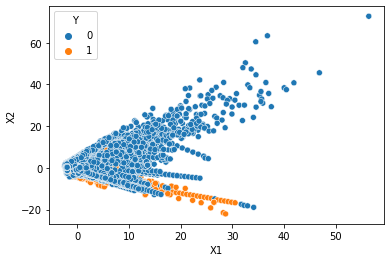

In [ ]:
sns.scatterplot(data=df_credit, x="X1", y="X2", hue="Y")

<AxesSubplot:xlabel='X1', ylabel='X2'>

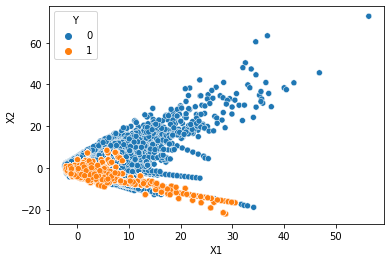

In [ ]:
sns.scatterplot(data=df_over_random, x="X1", y="X2", hue="Y")

In [ ]:
df_over_random.Y.value_counts()

0    284315
1    284315
Name: Y, dtype: int64

#### Smote

In [ ]:
X_smote, y_smote = over_sampling.SMOTE(random_state=42).fit_resample(X,y)
df_smote = pd.DataFrame.from_records(X_smote)
df_smote['Y'] = y_smote
df_smote

,X1,X2,Y
0,1.359780,0.071828,0
1,-1.191891,-0.265616,0
2,1.358334,1.340460,0
3,0.966301,0.185586,0
4,1.158246,-0.877576,0
...,...,...,...
568625,2.273846,-2.936601,1
568626,3.703030,-0.725070,1
568627,-0.363685,-1.619436,1
568628,2.683188,-3.301037,1


<AxesSubplot:xlabel='X1', ylabel='X2'>

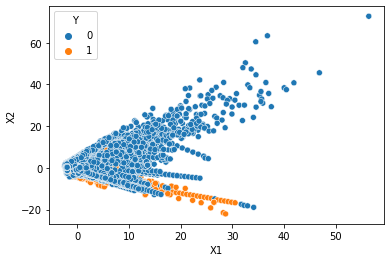

In [ ]:
sns.scatterplot(data=df_credit, x="X1", y="X2", hue="Y")

<AxesSubplot:xlabel='X1', ylabel='X2'>

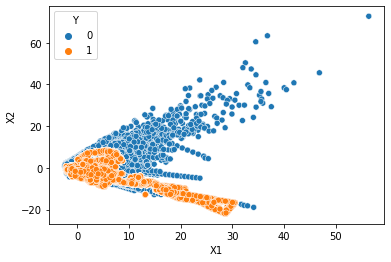

In [ ]:
sns.scatterplot(data=df_smote, x="X1", y="X2", hue="Y")

In [ ]:
df_smote.Y.value_counts()

0    284315
1    284315
Name: Y, dtype: int64

#### Borderline-Smote

In [ ]:
X_Bsmote, y_Bsmote = over_sampling.BorderlineSMOTE(random_state=42).fit_resample(X,y)
df_Bsmote = pd.DataFrame.from_records(X_Bsmote)
df_Bsmote['Y'] = y_Bsmote
df_Bsmote

,X1,X2,Y
0,1.359780,0.071828,0
1,-1.191891,-0.265616,0
2,1.358334,1.340460,0
3,0.966301,0.185586,0
4,1.158246,-0.877576,0
...,...,...,...
568625,-1.097478,-1.026837,1
568626,1.631021,-3.161307,1
568627,1.958950,-1.759349,1
568628,-1.856523,-1.107804,1


<AxesSubplot:xlabel='X1', ylabel='X2'>

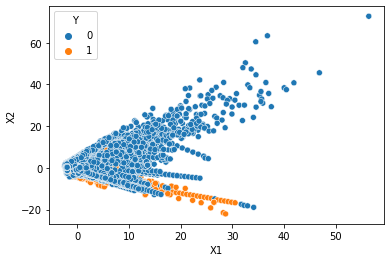

In [ ]:
sns.scatterplot(data=df_credit, x="X1", y="X2", hue="Y")

<AxesSubplot:xlabel='X1', ylabel='X2'>

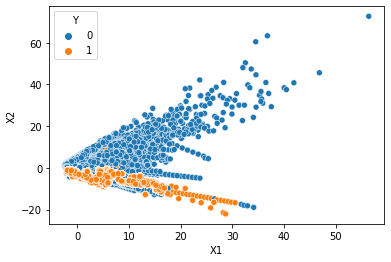

In [ ]:
sns.scatterplot(data=df_Bsmote, x="X1", y="X2", hue="Y")

In [ ]:
df_Bsmote.Y.value_counts()

0    284315
1    284315
Name: Y, dtype: int64

#### Adasyn

In [ ]:
X_adasyn, y_adasyn = over_sampling.ADASYN(random_state=42).fit_resample(X,y)
df_adasyn = pd.DataFrame.from_records(X_adasyn)
df_adasyn['Y'] = y_adasyn
df_adasyn

,X1,X2,Y
0,1.359780,0.071828,0
1,-1.191891,-0.265616,0
2,1.358334,1.340460,0
3,0.966301,0.185586,0
4,1.158246,-0.877576,0
...,...,...,...
568480,-1.946892,-0.546757,1
568481,-1.853963,-0.668944,1
568482,-1.721333,-0.030224,1
568483,-1.767697,-0.052217,1


<AxesSubplot:xlabel='X1', ylabel='X2'>

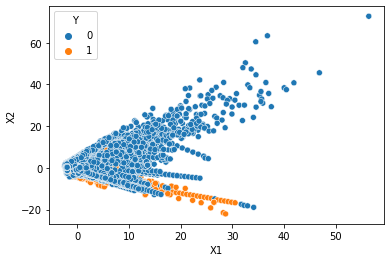

In [ ]:
sns.scatterplot(data=df_credit, x="X1", y="X2", hue="Y")

<AxesSubplot:xlabel='X1', ylabel='X2'>

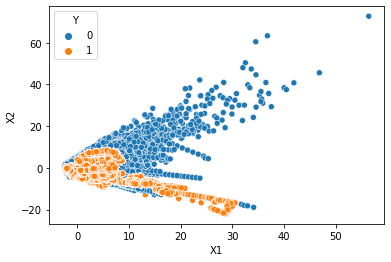

In [ ]:
sns.scatterplot(data=df_adasyn, x="X1", y="X2", hue="Y")

In [ ]:
df_adasyn.Y.value_counts()

0    284315
1    284170
Name: Y, dtype: int64